In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('breast_cancer.csv')

# Drop unnecessary columns (like 'id' and 'Unnamed: 32')
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode target variable: M -> 1 (Malignant), B -> 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Display dataset info
print(data.head())
print(data.info())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

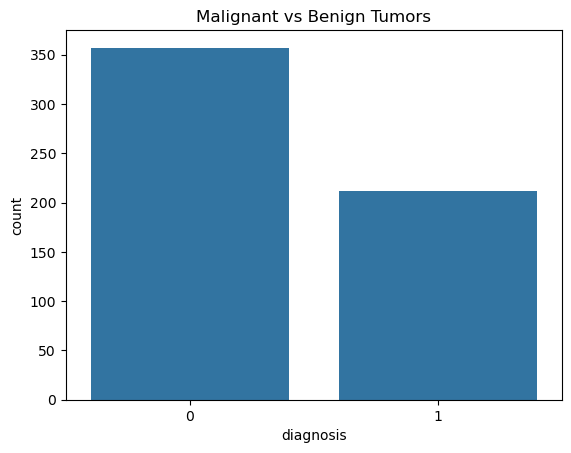

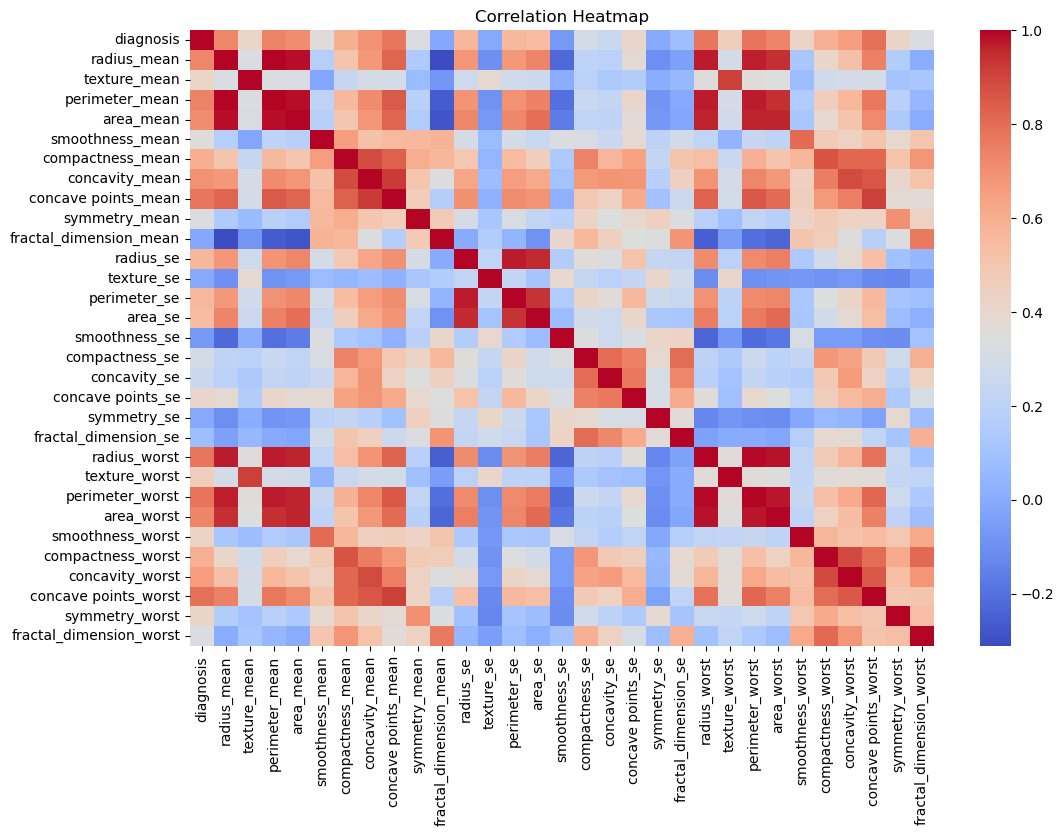

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of target variable
sns.countplot(x='diagnosis', data=data)
plt.title("Malignant vs Benign Tumors")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (x) and target (y)
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R^2 Score:", r2)

Linear Regression - Mean Squared Error: 0.06410886247029461
Linear Regression - R^2 Score: 0.7271016126223555


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(x_test)

# Evaluate
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression - Accuracy: 0.9736842105263158
Logistic Regression - Confusion Matrix:
 [[70  1]
 [ 2 41]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.9649122807017544
Random Forest - Confusion Matrix:
 [[70  1]
 [ 3 40]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(x_test)

# Evaluate
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Accuracy: 0.9473684210526315
Decision Tree - Confusion Matrix:
 [[68  3]
 [ 3 40]]
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('breast_cancer.csv')
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],     # Depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],       # Minimum samples in a leaf
    'bootstrap': [True, False]           # Use bootstrap sampling
}

In [11]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                       scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [12]:
# Best parameters and accuracy
print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_rf.best_score_)

# Test the best model on the test set
best_rf = grid_rf.best_estimator_
rf_test_accuracy = best_rf.score(x_test, y_test)
print("Test Set Accuracy with Best Random Forest Model:", rf_test_accuracy)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.9648351648351647
Test Set Accuracy with Best Random Forest Model: 0.956140350877193


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],      # Depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf
    'criterion': ['gini', 'entropy']      # Splitting criterion
}

In [14]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, 
                       scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_dt.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [15]:
# Best parameters and accuracy
print("Best Parameters:", grid_dt.best_params_)
print("Best Cross-Validated Accuracy:", grid_dt.best_score_)

# Test the best model on the test set
best_dt = grid_dt.best_estimator_
dt_test_accuracy = best_dt.score(x_test, y_test)
print("Test Set Accuracy with Best Decision Tree Model:", dt_test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.9428571428571428
Test Set Accuracy with Best Decision Tree Model: 0.9473684210526315


In [16]:
print("Random Forest Best Test Accuracy:", rf_test_accuracy)
print("Decision Tree Best Test Accuracy:", dt_test_accuracy)

Random Forest Best Test Accuracy: 0.956140350877193
Decision Tree Best Test Accuracy: 0.9473684210526315


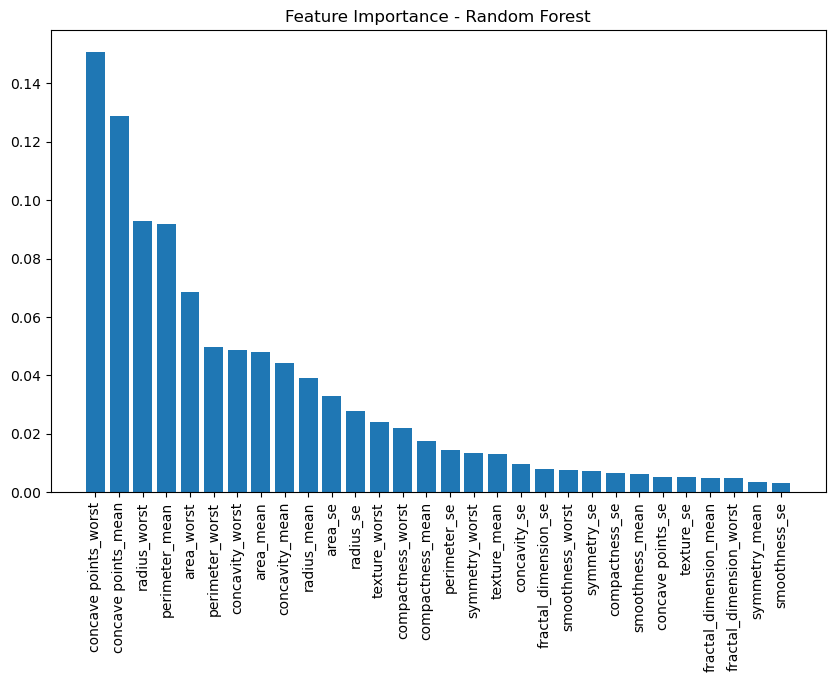

In [17]:
# Random Forest Feature Importance
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_rf.feature_importances_
features = data.drop('diagnosis', axis=1).columns

# Plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()

In [18]:
# Best parameters for Random Forest
print("Best Random Forest Parameters:", grid_rf.best_params_)

# Best parameters for Decision Tree
print("Best Decision Tree Parameters:", grid_dt.best_params_)

Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [19]:
print("Random Forest Best Test Accuracy:", rf_test_accuracy)
print("Decision Tree Best Test Accuracy:", dt_test_accuracy)

Random Forest Best Test Accuracy: 0.956140350877193
Decision Tree Best Test Accuracy: 0.9473684210526315


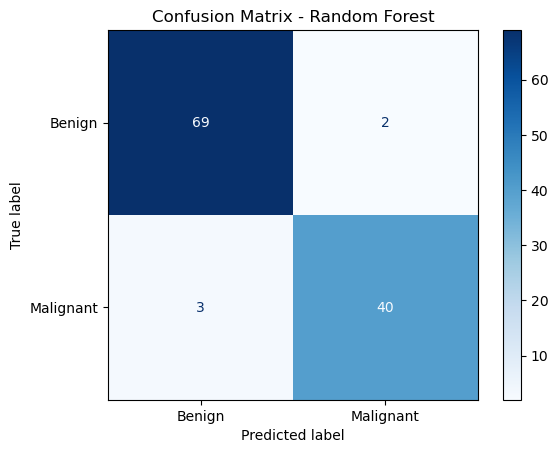

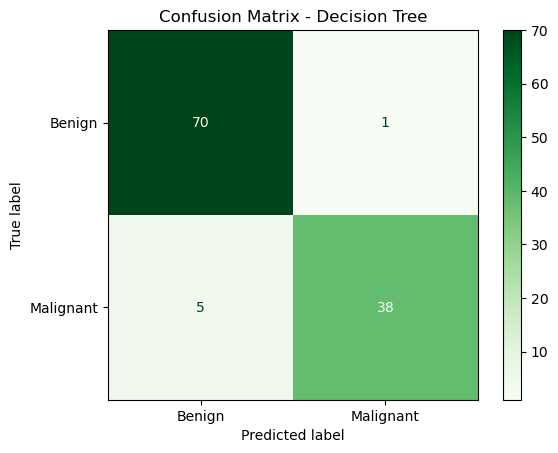

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, best_rf.predict(x_test))
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Benign', 'Malignant'])
rf_disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, best_dt.predict(x_test))
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Benign', 'Malignant'])
dt_disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

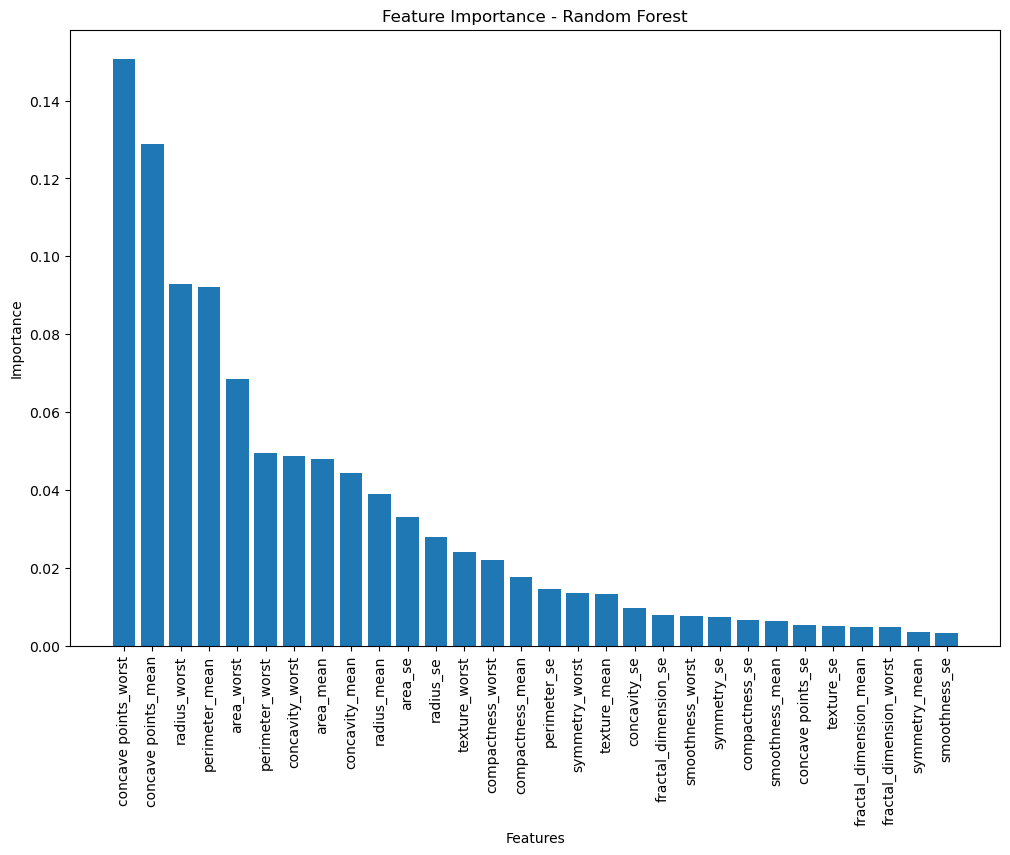

In [21]:
import numpy as np

# Get feature importances
feature_importances = best_rf.feature_importances_
features = data.drop('diagnosis', axis=1).columns

# Sort by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]

# Plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), sorted_features, rotation=90)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [22]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC Curve
rf_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Decision Tree ROC Curve
dt_probs = best_dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_test' is not defined

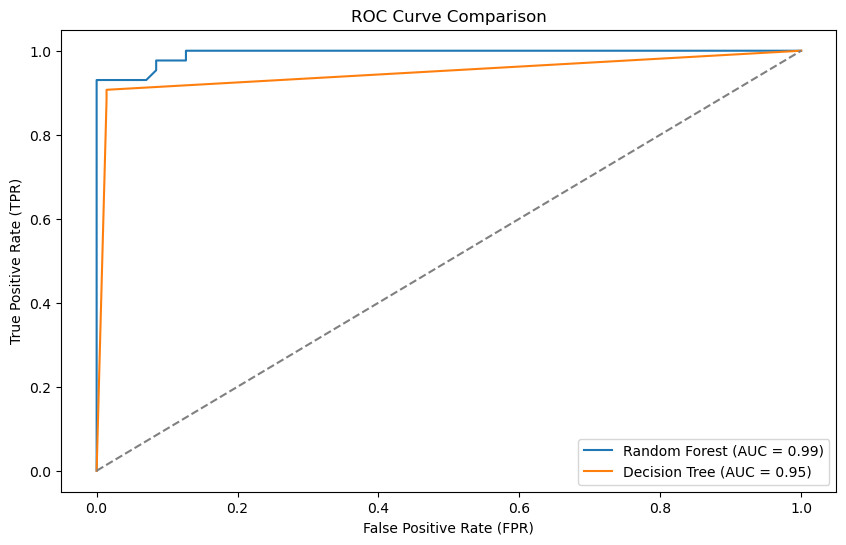

In [23]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC Curve
rf_probs = best_rf.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Decision Tree ROC Curve
dt_probs = best_dt.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

Top 10 Most Important Features:
                 Feature  Importance
27  concave points_worst    0.150685
7    concave points_mean    0.128848
20          radius_worst    0.092888
2         perimeter_mean    0.091990
23            area_worst    0.068475
22       perimeter_worst    0.049566
26       concavity_worst    0.048796
3              area_mean    0.047913
6         concavity_mean    0.044311
0            radius_mean    0.038975


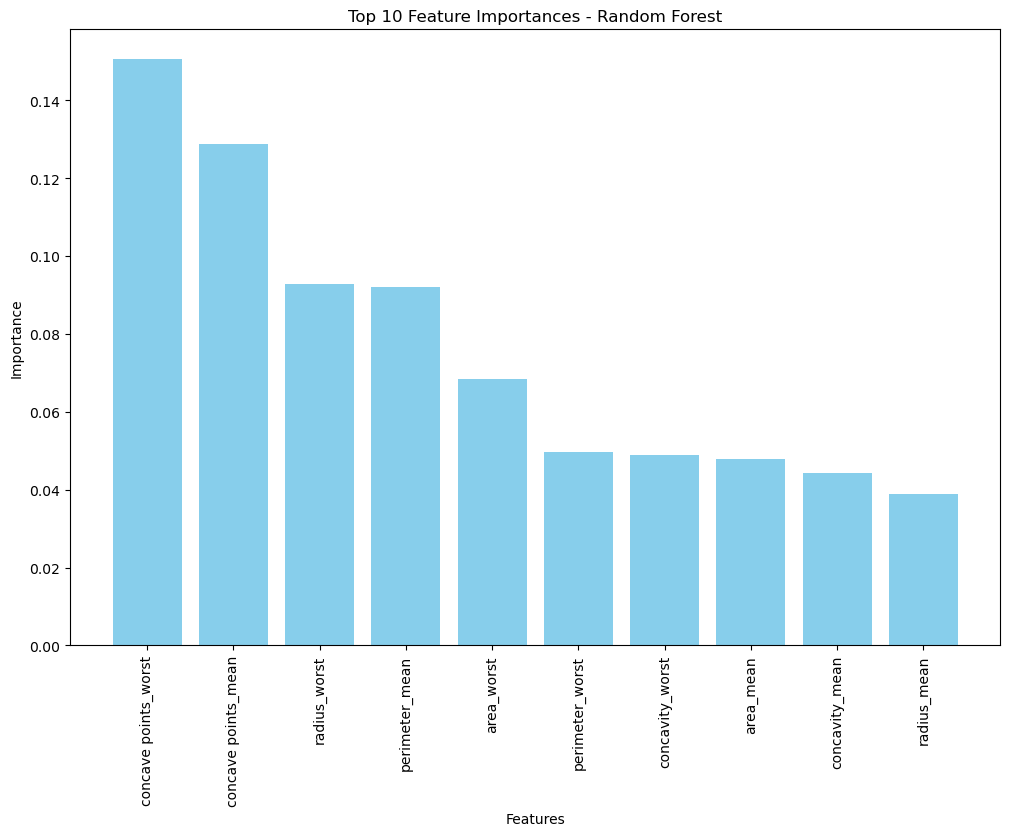

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances and feature names
feature_importances = best_rf.feature_importances_
features = data.drop('diagnosis', axis=1).columns

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Plot
plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xticks(rotation=90)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Classification report for Random Forest
rf_report = classification_report(y_test, best_rf.predict(x_test), target_names=['Benign', 'Malignant'])
print("Classification Report - Random Forest")
print(rf_report)

# Classification report for Decision Tree
dt_report = classification_report(y_test, best_dt.predict(x_test), target_names=['Benign', 'Malignant'])
print("Classification Report - Decision Tree")
print(dt_report)

Classification Report - Random Forest
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report - Decision Tree
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96        71
   Malignant       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [26]:
import joblib

joblib.dump(rf_model, 'breast_cancer_ml_model.pkl')

['breast_cancer_ml_model.pkl']